<b>Import needed libraries</b>

In [1]:
import os
import urllib2
import pyart
#import numpy as np
import matplotlib.pyplot as plt
import artview

%matplotlib inline

/Users/guy/anaconda/lib/python2.7/site-packages/matplotlib/__init__.py:1318: UserWarning:  This call to matplotlib.use() has no effect
because the backend has already been chosen;
matplotlib.use() must be called *before* pylab, matplotlib.pyplot,
or matplotlib.backends is imported for the first time.

  warnings.warn(_use_error_msg)


<b>Create a class for accessing and plotting latest radar image</b>

In [2]:
class Get88D(object):
    """
    A class mentod to retrieve and plot NEXRAD data.
    
    The metar retrieval is a modification of code found at:
    https://github.com/akrherz/iem/blob/master/scripts/asos/iem_scraper_example.py
    
    It is dependent upon the Iowa State Mesonet database.
    """
    def __init__(self, radarID):
        '''Initialize the class'''

        # Set date formats to be used with datetime
        self.d_fmt = "%Y-%m-%d %H:%M"
        self.dout_fmt = "%Y-%m-%d_%H:%M"
        
        # Use passed arguments
        self.radarID = radarID

    def get_data(self):
        '''Function to return metar data and create output text file'''
        # Query the radarID directory to get file list
        SERVICE = "http://nomads.ncep.noaa.gov/pub/data/nccf/radar/nexrad_level2"
        nexurl = '%s/%s/'%(SERVICE, self.radarID)
        response = urllib2.urlopen("%s%s"%(nexurl, "dir.list"))
        self.list88D = response.read().split("\n")
        
        # At this point you have a list of data files, BUT there are 2 columns
        # col 1 = file size, col2 = filename
        
        # Now grab the latest data file and save it locally to open
        data = urllib2.urlopen("%s%s"%(nexurl,self.list88D[-2].split(" ")[1]))
        with open("latest88D.bz", "wb") as code:
            code.write(data.read())

    def plot_nexrad(self, vmin=None, vmax=None, xlims=None, ylims=None):
        '''Create a plot'''
        # Create a PyArt radar instance
        fig, ax = plt.subplots()
        #ax = plt.axes()
        self.r=pyart.io.read_nexrad_archive("latest88D.bz")
        d=pyart.graph.RadarDisplay(self.r)
        d.plot('reflectivity',0, vmin=vmin, vmax=vmax, cmap="pyart_Carbone42")
        if xlims is None:
            xlims = (-250., 250)
        if ylims is None:
            ylims = (-250., 250)
        d.set_limits(xlims, ylims)
        
    def remove_bz(self):
        os.remove("latest88D.bz")

<b>Now lets make a current plot!</b>

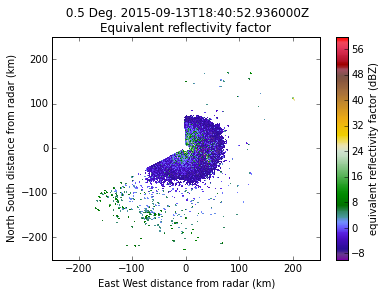

In [3]:
radarID = "KABR"#KCYS"
Radar = Get88D(radarID)
Radar.get_data()
Radar.plot_nexrad(vmin=-10, vmax=60.)
Radar.remove_bz()

<b> Now we can open using ARTView to access features via GUI</b>

In [4]:
artview.view.view(Radar.r)

Changed Scan types, reinitializing
